<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/TRABAJO-FINAL-TECNICAS-DE-CIENCIAS-DE-DATOS/blob/main/Informe_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
TRABAJO FINAL DE TÉCNICAS PARA LA CIENCIA DE DATOS
```



#**TÉCNICA DE CLASIFICACIÓN NO SUPERVISADA DE LAS COMUNIDADES AUTONOMAS DE ESPAÑA SEGÚN LOS NIVELES DE RIESGOS DE CONTAMINACIÓN ATMOSFÉRICA**

*Periodo analizado: 2018–2022 — Contaminantes: PM2.5, NO2 — Unidad territorial: Comunidades Autónomas - España*

##**1. Introducción**

El análisis de datos ambientales se ha convertido en una herramienta clave para comprender la calidad del aire y su impacto en la salud pública. En el presente trabajo se analizó los niveles de contaminación atmosférica registrados en diferentes ciudades de España, utilizando datos oficiales publicados por la Agencia Europea de Medio Ambiente (EEA).

Teniendo en cuenta que la contaminación atmosférica continúa siendo uno de los principales factores de riesgo ambiental en Europa (Agencia Europea de Medio Ambiente, 2023).

El propósito general es organizar y transformar los datos de tal forma que permitan estudiar patrones de contaminación por ciudad y, posteriormente, transformar, estandarizar y aplicar técnicas de aprendizaje automático no supervisado para agrupar ciudades españolas según sus niveles de contaminación entre 2018 y 2022. Finalmente, comparar los clusters obtenidos con los valores guía de la calidad del aire establecidos por Organización Mundial de la Salud en 2021.

##**2. Problemática**

La OMS advierte que el 99% de la población mundial respira aire que excede los niveles recomendados de calidad del aire. La exposición crónica al NO₂ y PM2.5 contribuye de forma significativa a la mortalidad global. (Organización Mundial de la Salud, 2021)

A nivel europeo, y particularmente en España, existen diferencias significativas entre sus Comunidades Autónomas (CCAA) en cuanto a calidad del aire, debido a factores como densidad urbana, actividad industrial, transporte y condiciones meteorológicas.

*Problema de estudio:*


 ¿Cómo agrupar a las Comunidades Autónomas de España según sus niveles de contaminación atmosférica por PM2.5 - NO2 en el periodo 2018–2022, mediante técnicas de aprendizaje automático no supervisado, y cómo se relacionan estos grupos con los límites recomendados por las Guías de Calidad del Aire de la OMS 2021?


## **3. Objetivos**

#### **3.1. General**


Agrupar las Comunidades Autónomas de España según sus niveles de contaminación atmosférica mediante una técnica de aprendizaje automático no supervisado, analizando posteriormente si los grupos se ajustan o se alejan de los valores recomendados por la OMS.

#### **3.2. Especificos**


  * Recopilar y seleccionar los datos atmosféricos de PM2.5 y NO2 para España en el periodo 2018–2022 desde la European Environment Agency (EEA).

  * Procesar y estructurar el dataset, integrando la información a nivel de Comunidad Autónoma y filtrando únicamente las variables necesarias para el análisis.

  * Aplicar el algoritmo K-Means como técnica principal de aprendizaje no supervisado, identificando grupos de ciudades con patrones similares de contaminación atmosférica.

  * Complementar el análisis mediante clustering jerárquico aglomerativo, con el fin de validar la coherencia de los agrupamientos obtenidos con K-means.

  * Comparar los centroides de los clusters con los valores guía de calidad del aire de la OMS (2021) para interpretar los niveles de riesgo ambiental asociados a cada grupo.

  * Visualizar y comparar los resultados por Comunidad Autónoma, identificando patrones territoriales y diferencias regionales en contaminación.

  * Evaluar la evolución temporal de los contaminantes entre 2018 y 2022 para determinar tendencias de mejora o empeoramiento.

## **4. Datos Recogidos**

####**4.1. Fuente de datos**

El conjunto de datos utilizado en este estudio procede de la Agencia Europea de Medio Ambiente (European Environment Agency, EEA), específicamente del dataset Air Quality – Health Risk Assessments, disponible públicamente a través de la plataforma EEA DataHub. El dataset contiene información armonizada sobre contaminación atmosférica para los países de la Unión Europea y permite analizar la exposición de la población a distintos contaminantes.

Para este estudio se seleccionaron únicamente los datos correspondientes a España y para el periodo 2018–2022, con el fin de evaluar la evolución reciente de la calidad del aire en las Comunidades Autónomas. Los registros provienen de áreas urbanas clasificadas como Urban Centres (grid), definidas mediante la malla europea GEOSTAT de 1 km² (Eurostat, 2019), lo que proporciona una alta resolución espacial y permite capturar niveles de contaminación representativos de zonas densamente pobladas.

####**4.2. Variables recogidas**

El objetivo del proyecto es clasificar las Comunidades Autónomas según sus niveles de contaminación atmosférica, por lo que se extrajeron únicamente las variables estrictamente relacionadas con los contaminantes. Las variables finales utilizadas fueron:

* Air Pollution Average [µg/m³]

  Representa la concentración media anual del contaminante en la ciudad.

* Air Pollutant
  
  Indica el tipo de contaminante atmosférico.

  Para este estudio se filtraron únicamente:
      
      ✔ PM2.5 (µg/m³)
      ✔ NO₂ (µg/m³)

* Year
  
  Año del registro (2018, 2019, 2020, 2021, 2022).
  Este campo permitió generar columnas diferenciadas por contaminante y año en el dataset.

* City or Territory
  
  Ciudad o área urbana donde se midió el contaminante.

* CCAA: Comunidad Autónoma

  Variable derivada a partir de la ciudad original del dataset. Permite agrupar la información a nivel regional.

Estas variables constituyen la base para el análisis de contaminación y para la posterior clasificación de las regiones.

####**4.3. Variables presentes en el dataset pero no utilizadas en el modelo**

El dataset original incluye variables adicionales relacionadas con población, densidad urbana e impactos en salud. Estas variables se describen por transparencia metodólogica, aunque no se usaron en el modelo final:

* Air Pollution Population Weighted Average [µg/m³]

  Concentración media ponderada según población expuesta. Representa mejor el impacto en zonas urbanas densamente pobladas.


* Affected Population

  Población expuesta al nivel de contaminación registrado.

* Populated Area [km²]
  
  Superficie urbanizada del área donde se detecta el contaminante.

*Justificación:*

Estas variables pueden resultar útiles para estudios de impacto en salud, pero se descartaron para evitar confusión en la fase de modelado y mantener un enfoque estrictamente ambiental, centrado únicamente en los niveles reales de contaminación.

####**4.4. Variables eliminadas**

Aunque el dataset original incluye otros campos relacionados con mortalidad e impacto en salud, estos no se utilizaron en el modelo, ya que representan información derivada de los contaminantes y no corresponden al objetivo de clasificar contaminación ambiental. Las variables eliminadas fueron:

* Mortality

* Outcome

* Attributable deaths (AD)

* Value (estimación de muertes según funciones de riesgo OMS)

* Value for 100k population

Variables clínicas de enfermedades específicas (diabetes, cáncer, enfermedades respiratorias, etc.)

*Justificación:*

Estas variables solo se emplearon durante el análisis exploratorio para comprender el impacto en salud, pero fueron descartadas para evitar sesgos en el modelo y mantener el enfoque exclusivamente ambiental.

##**5. Tratamiento de Datos**

El tratamiento de los datos constituye una etapa fundamental en este trabajo, ya que garantiza que la información utilizada en el análisis sea coherente, precisa y adecuada para la aplicación de técnicas de aprendizaje automático. A lo largo de este apartado llevo a cabo un proceso sistemático que incluye la selección de herramientas, la carga y exploración del conjunto de datos original, su limpieza, la transformación estructural de las variables y el preprocesamiento necesario para preparar los datos de entrada del algoritmo.

En primer lugar, presento las bibliotecas empleadas para el manejo y procesamiento del dataset, principalmente pandas y Scikit-Learn, esenciales para la gestión eficiente de datos tabulares y para la estandarización de las variables. Posteriormente, analizo el conjunto de datos inicial y aplico diversas operaciones de limpieza, incluyendo la agregación de información relevante, el filtrado de filas y columnas y la construcción de una estructura unificada por ciudad.

Finalmente, preparo el dataset definitivo mediante técnicas de reestructuración y estandarización, lo que permite disponer de una matriz de datos limpia, consistente y lista para ser utilizada en los algoritmos de clasificación. Este proceso garantiza que los resultados obtenidos posteriormente sean válidos y reflejen adecuadamente la realidad representada por los datos.

####**5.1. Herramientas para el tratamiento de los datos: bibliotecas**

Esta subsección está dedicada a mencionar las bibliotecas y funciones que necesitaremos en el desarrollo de este Trabajo Final.

#### `Pandas`



La biblioteca Pandas proporciona varias herramientas y estructuras de
datos para el análisis de datos, incluida la clase fundamental DataFrame.

Un DataFrame de Pandas es una estructura de datos tabular, similar a una hoja de cálculo de Excel. Pandas ofrece una amplia variedad de métodos para modificar, consultar y operar sobre esta tabla; entre ellos, funciones de filtrado similares a SQL y herramientas para realizar uniones entre tablas. Además, cada columna puede tener un tipo de dato independiente (como enteros, fechas, números de punto flotante o cadenas), lo que proporciona una gran flexibilidad en el manejo de la información.

Una de las herramientas más valiosas que ofrece Pandas, y que justifica su uso en este Trabajo Final, es su capacidad para leer e importar datos desde una amplia variedad de formatos y fuentes, como archivos SQL, Excel o ficheros de valores separados por comas (CSV).


*pandas - Python Data Analysis Library. (s. f.). [Última consulta 22 de noviembre de 2025](https://pandas.pydata.org/)*

#### `Scikit-Learn`


La biblioteca Scikit-Learn incluye una amplia colección de algoritmos de aprendizaje automático modernos, junto con una documentación detallada para cada uno de ellos. Además, incorpora herramientas muy utilizadas por su sencillez y versatilidad. En este trabajo empleamos la función `StandardScaler`, que forma parte de Scikit-Learn y que permite estandarizar los datos antes de su análisis.

*scikit-learn: machine learning in Python - scikit-learn 1.5.0 documentation. (s. f.) [Última consulta 22 de noviembre de 2025](https://scikit-learn.org/stable/)*



> Cargamos los paquetes necesarios





In [37]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler

####**5.2. Conjunto de datos original**

El conjunto de datos se carga desde un archivo CSV y, a continuación, se inspecciona mediante:

* La visualización de la forma del DataFrame (número de filas y columnas),
* Y la revisión de sus primeras observaciones.

Con el objetivo de verificar que los datos se han importado correctamente y comprender la estructura inicial de las variables disponibles.

In [38]:
uploaded = files.upload()
df = pd.read_csv('causas.csv')
#df = pd.read_csv('causas.csv')

Saving causas.csv to causas (1).csv


In [39]:
print('Número de filas: ', df.shape[0])
print('Número de columnas: ', df.shape[1])

Número de filas:  25440
Número de columnas:  23


In [40]:
print(df.head(4))

  City Boundary Specification (LAU/grid) Country Or Territory  \
0                   Urban Centres (grid)                Spain   
1                   Urban Centres (grid)                Spain   
2                   Urban Centres (grid)                Spain   
3                   Urban Centres (grid)                Spain   

  City Or Territory      City Code  Year Air Pollutant Data Aggregation Id  \
0  Collado Villalba  GEOSTAT11_748  2021           NO2                 P1Y   
1  Collado Villalba  GEOSTAT11_748  2021            O3              SOMO35   
2  Collado Villalba  GEOSTAT11_748  2021         PM2.5                 P1Y   
3  Collado Villalba  GEOSTAT11_748  2021         PM2.5                 P1Y   

                     Scenario   Category            Outcome  ...  \
0  Baseline from WHO 2021 AQG  Mortality  Diabetes Mellitus  ...   
1  Baseline from WHO 2021 AQG  Mortality         All causes  ...   
2  Baseline from WHO 2021 AQG  Morbidity             Stroke  ...   
3  Baseline

####**5.3. Limpieza del conjunto de datos**

Esta sección reúne todos los pasos de depuración. Incluye: agregación de características al conjunto de datos, filtrado de datos, eliminación de instancias duplicadas entre otros procedimientos.

**5.3.1. Agregación de variables**

En un primer paso observamos que el conjunto de datos incluye la información relativa a la ciudad en la que se registraron los niveles de contaminación. Dado que el objetivo final es clasificar a las Comunidades Autónomas, incorporamos al conjunto de datos una nueva característica que indica la Comunidad Autónoma a la que pertenece cada ciudad.

In [41]:
df["City Or Territory"].unique()

array(['Collado Villalba', 'Terrassa', 'Toledo', 'Santiago de Compostela',
       'Sevilla', 'Santa Monica', 'Santander', 'Córdoba', 'Tomares',
       'Talavera de la Reina', 'Torrejón de Ardoz', 'Coslada',
       'Tarragona', 'Torrelavega', 'Cuenca', 'Dos Hermanas',
       'Torremolinos', 'Eivissa', 'Torrevieja', 'el Masnou',
       "El Port de Sagunt / Canet d'En Berenguer", 'Valdemoro',
       'El Prat de Llobregat', 'Valencia', 'Valladolid', 'Elche/Elx',
       'Vigo', 'Elda', 'Viladecans', 'Ferrol', 'Vilanova i la Geltrú',
       'Fuengirola', 'Vitoria/Gasteiz', 'Fuenlabrada', 'Gandia', 'Zamora',
       'Gijón', 'Zaragoza', 'Girona', 'Granada', 'Granollers',
       'Guadalajara', 'Huelva', 'Igualada', 'Irun', 'Jaén',
       'Jerez de la Frontera', 'León', 'Linares',
       'Línea de la Concepción, La', 'Lleida', 'Logroño', 'Lorca', 'Lugo',
       'Madrid', 'Majadahonda', 'Málaga', 'Manresa', 'Marbella', 'Mataró',
       'Melilla', 'Mérida', 'A Coruña', 'Albacete', 'Mollet del Vall

Observamos que hay dos casillas, Santa Mónica y All Urban Centres in a Country, que no son ciudades de España. Las eliminamos y procedemos a incluir la columna `Comunidad Autónoma`.

In [42]:
df = df[df["City Or Territory"] != "All Urban Centres in a Country"]
df = df[df["City Or Territory"] != "Santa Monica"]

mapa_ccaa = {

    # ANDALUCÍA
    'Sevilla': 'Andalucía',
    'Córdoba': 'Andalucía',
    'Tomares': 'Andalucía',
    'Dos Hermanas': 'Andalucía',
    'Torremolinos': 'Andalucía',
    'Fuengirola': 'Andalucía',
    'Granada': 'Andalucía',
    'Huelva': 'Andalucía',
    'Jaén': 'Andalucía',
    'Jerez de la Frontera': 'Andalucía',
    'Linares': 'Andalucía',
    'Línea de la Concepción, La': 'Andalucía',
    'Marbella': 'Andalucía',
    'Málaga': 'Andalucía',
    'Puerto de Santa María, El': 'Andalucía',
    'San Fernando': 'Andalucía',
    'Sanlúcar de Barrameda': 'Andalucía',
    'Chiclana de la Frontera': 'Andalucía',
    'Cádiz': 'Andalucía',
    'Benalmádena': 'Andalucía',
    'Algeciras': 'Andalucía',
    'Almería': 'Andalucía',
    'Alcalá de Guadaíra': 'Andalucía',

    # ARAGÓN
    'Zaragoza': 'Aragón',

    # ASTURIAS
    'Gijón': 'Asturias',
    'Oviedo': 'Asturias',
    'Avilés': 'Asturias',

    # BALEARES
    'Eivissa': 'Islas Baleares',
    'Palma de Mallorca': 'Islas Baleares',

    # CANTABRIA
    'Santander': 'Cantabria',
    'Torrelavega': 'Cantabria',

    # CASTILLA-LA MANCHA
    'Toledo': 'Castilla-La Mancha',
    'Cuenca': 'Castilla-La Mancha',
    'Guadalajara': 'Castilla-La Mancha',
    'Talavera de la Reina': 'Castilla-La Mancha',
    'Albacete': 'Castilla-La Mancha',
    'Ciudad Real': 'Castilla-La Mancha',

    # CASTILLA Y LEÓN
    'Valladolid': 'Castilla y León',
    'Zamora': 'Castilla y León',
    'León': 'Castilla y León',
    'Palencia': 'Castilla y León',
    'Ponferrada': 'Castilla y León',
    'Salamanca': 'Castilla y León',
    'Burgos': 'Castilla y León',
    'Ávila': 'Castilla y León',

    # CATALUÑA
    'Terrassa': 'Cataluña',
    'Tarragona': 'Cataluña',
    'el Masnou': 'Cataluña',
    'Viladecans': 'Cataluña',
    'El Prat de Llobregat': 'Cataluña',
    'Girona': 'Cataluña',
    'Granollers': 'Cataluña',
    'Igualada': 'Cataluña',
    'Lleida': 'Cataluña',
    'Manresa': 'Cataluña',
    'Mataró': 'Cataluña',
    'Mollet del Vallès': 'Cataluña',
    'Reus': 'Cataluña',
    'Sabadell': 'Cataluña',
    'Sant Boi de Llobregat': 'Cataluña',
    'Sant Cugat del Vallès/Rubí': 'Cataluña',
    'Barcelona': 'Cataluña',
    'Castelldefels': 'Cataluña',
    'Vilanova i la Geltrú': 'Cataluña',
    'Esplugues de Llobregat': 'Cataluña',
    'Cornellà de Llobregat': 'Cataluña',
    'Cerdanyola del Vallès': 'Cataluña',
    "L'Hospitalet de Llobregat": 'Cataluña',
    'Badalona': 'Cataluña',
    'Rubí': 'Cataluña',

    # CEUTA Y MELILLA
    'Ceuta': 'Ciudad Autónoma de Ceuta',
    'Melilla': 'Ciudad Autónoma de Melilla',

    # EXTREMADURA
    'Cáceres': 'Extremadura',
    'Badajoz': 'Extremadura',
    'Mérida': 'Extremadura',

    # GALICIA
    'Santiago de Compostela': 'Galicia',
    'Ferrol': 'Galicia',
    'Vigo': 'Galicia',
    'Pontevedra': 'Galicia',
    'A Coruña': 'Galicia',
    'Lugo': 'Galicia',
    'Ourense': 'Galicia',

    # LA RIOJA
    'Logroño': 'La Rioja',

    # MADRID
    'Collado Villalba': 'Comunidad de Madrid',
    'Torrejón de Ardoz': 'Comunidad de Madrid',
    'Coslada': 'Comunidad de Madrid',
    'Valdemoro': 'Comunidad de Madrid',
    'Madrid': 'Comunidad de Madrid',
    'Majadahonda': 'Comunidad de Madrid',
    'Fuenlabrada': 'Comunidad de Madrid',
    'Parla': 'Comunidad de Madrid',
    'Pozuelo de Alarcón': 'Comunidad de Madrid',
    'Rozas de Madrid, Las': 'Comunidad de Madrid',
    'Rivas-Vaciamadrid': 'Comunidad de Madrid',
    'San Sebastián de los Reyes': 'Comunidad de Madrid',
    'Alcalá de Henares': 'Comunidad de Madrid',
    'Leganés': 'Comunidad de Madrid',
    'Alcorcón': 'Comunidad de Madrid',
    'Getafe': 'Comunidad de Madrid',
    'Alcobendas': 'Comunidad de Madrid',
    'Móstoles': 'Comunidad de Madrid',

    # MURCIA
    'Murcia': 'Región de Murcia',
    'Lorca': 'Región de Murcia',
    'Cartagena': 'Región de Murcia',

    # NAVARRA
    'Pamplona/Iruña': 'Navarra',

    # PAÍS VASCO
    'Vitoria/Gasteiz': 'País Vasco',
    'Bilbao': 'País Vasco',
    'Irun': 'País Vasco',
    'Santurtzi': 'País Vasco',
    'Barakaldo': 'País Vasco',
    'Getxo': 'País Vasco',
    'San Sebastián/Donostia': 'País Vasco',

    # COMUNIDAD VALENCIANA
    'Gandia': 'Comunidad Valenciana',
    'Torrevieja': 'Comunidad Valenciana',
    'Elche/Elx': 'Comunidad Valenciana',
    'Alicante/Alacant': 'Comunidad Valenciana',
    'Elda': 'Comunidad Valenciana',
    "El Port de Sagunt / Canet d'En Berenguer": 'Comunidad Valenciana',
    'Benidorm': 'Comunidad Valenciana',
    'Castellón de la Plana/Castelló de la Plana': 'Comunidad Valenciana',
    'Alcoi/Alcoy': 'Comunidad Valenciana',
    'Alcoy': 'Comunidad Valenciana',
    'Sagunto': 'Comunidad Valenciana',
    'Torrent': 'Comunidad Valenciana',
    'Paterna': 'Comunidad Valenciana',
    'Mislata': 'Comunidad Valenciana',
    'San Vicente del Raspeig/Sant Vicent del Raspeig': 'Comunidad Valenciana',
    'Valencia': 'Comunidad Valenciana'
}

df["CCAA"] = df["City Or Territory"].map(mapa_ccaa)

**5.3.2. Filtrado filas y columnas**

En este paso filtramos el conjunto de datos para conservar únicamente la información relevante para el análisis. En concreto,

* Seleccionamos las ciudades clasificadas como "Urban Centres (grid)", ya que representan áreas urbanas coherentes para el estudio de contaminación.
* Los que se atribuyen a las muertes `Health Indicator = Attributable deaths (AD)`.
* Limitamos los datos a los contaminantes NO2	y PM2.5.
* Conservamos únicamente las características necesarias para el análisis: `CCAA`,`City Or Territory`, `Air Pollutant`, `Year` y `Air Pollution Average [ug/m3]`.

También se eliminarán las instancias duplicadas.

In [43]:
df = df[
    (df["City Boundary Specification (LAU/grid)"] == "Urban Centres (grid)") &
    (df["Health Indicator"] == "Attributable deaths (AD)") &
    (df["Air Pollutant"] != "O3")
]

columnas = ['CCAA','City Or Territory','Air Pollutant','Year',
            'Air Pollution Average [ug/m3]']

df = df[columnas].copy()
df = df.drop_duplicates()

In [44]:
print(df.head(4))

                   CCAA City Or Territory Air Pollutant  Year  \
4   Comunidad de Madrid  Collado Villalba         PM2.5  2021   
11  Comunidad de Madrid  Collado Villalba         PM2.5  2022   
20   Castilla-La Mancha            Toledo           NO2  2018   
23   Castilla-La Mancha            Toledo         PM2.5  2021   

    Air Pollution Average [ug/m3]  
4                             7.3  
11                            8.3  
20                           19.1  
23                           10.9  


####**5.4. Transformación del conjunto de datos**

Con el objetivo de preparar los datos para su uso en el algoritmo de clasificación, transformamos el conjunto de datos a un formato estructurado que permita trabajar con una única observación por ciudad y con todas las variables relevantes distribuidas en columnas. Para ello, realizamos dos pasos:

**5.4.1. Selección de los valores de contaminación**

A partir de la variable Air Pollution Average [µg/m³], creamos una nueva columna que contiene exclusivamente el valor numérico de contaminación asociado a cada registro. Este valor constituye la medida principal sobre la que se construirá el conjunto de datos final.

**5.4.2. Reestructuración del conjunto de datos a formato ancho**

Mediante una tabla dinámica, reorganizamos la información para que cada ciudad aparezca representada en una sola fila. En este proceso, cada combinación de contaminante y año pasa a convertirse en una columna independiente, cuyo contenido corresponde al valor de contaminación previamente seleccionado.

Esta transformación permite disponer de un conjunto de datos compacto, en el que cada fila representa a una ciudad y cada columna refleja la concentración de un contaminante en un año concreto, facilitando así su uso posterior en los algoritmos de análisis no supervisado.

In [45]:
# Paso 1.
df["valor"] = df["Air Pollution Average [ug/m3]"]

# Paso 2.
df_final = df.pivot_table(
    index="City Or Territory",
    columns=["Air Pollutant", "Year"],
    values="valor"
)

df_final.columns = [
    f"{pollutant}_{year}" for pollutant, year in df_final.columns
]

df_final["CCAA"] = df_final.index.map(mapa_ccaa)

df_final = df_final.reset_index()

cols = ["CCAA", "City Or Territory"] + [
    col for col in df_final.columns if col not in ["CCAA", "City Or Territory"]
]
df_final = df_final[cols]
df_final = df_final.sort_values(by=["CCAA", "City Or Territory"]).reset_index(drop=True)

**5.4.3. Datos finales**

In [46]:
print('Número de filas: ', df_final.shape[0])
print('Número de columnas: ', df_final.shape[1])

Número de filas:  104
Número de columnas:  12


In [47]:
print(df_final.head())

        CCAA        City Or Territory  NO2_2018  NO2_2019  NO2_2020  NO2_2021  \
0  Andalucía       Alcalá de Guadaíra      17.9      16.0      13.8      13.5   
1  Andalucía                Algeciras      19.8      19.3      16.4      14.9   
2  Andalucía                  Almería      18.7      15.9      12.0      10.9   
3  Andalucía  Chiclana de la Frontera      11.3      11.0       8.4       8.7   
4  Andalucía                    Cádiz      18.8      14.8      11.2      11.7   

   NO2_2022  PM2.5_2018  PM2.5_2019  PM2.5_2020  PM2.5_2021  PM2.5_2022  
0      14.1        10.2        10.2        11.2        11.1        12.7  
1      15.2        12.4        11.0        10.7         9.1        10.7  
2      11.9        15.7        18.6        13.6        11.0        15.4  
3       9.9        10.1        10.8         9.3         7.7         8.1  
4      13.9        11.1         9.7         9.5         7.8         8.0  


####**5.5. Preprocesamiento de los datos: estandarización**

Cuando todas las variables se miden en una misma escala continua, una solución ampliamente recomendada para evitar que las diferencias en la magnitud o variabilidad de cada variable afecten al análisis es estandarizarlas antes de realizar cualquier técnica de agrupamiento.

El procedimiento más habitual consiste en transformar cada variable mediante la puntuación z, dividiendo por su desviación estándar calculada a partir de todo el conjunto de objetos que se pretende agrupar. Esta transformación recibe distintos nombres en la literatura, como autoescalado, estandarización o z-scoring.

In [65]:
X = df_final.select_dtypes(include='float') # seleccionamos las variables continuas

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # escalamos los datos

In [63]:
X_scaled

array([[-0.17287542, -0.35650858, -0.03447427, ...,  0.48487956,
         0.74051991,  0.85389399],
       [ 0.24833523,  0.35361182,  0.65603257, ...,  0.23374672,
        -0.31736568, -0.11085316],
       [ 0.00447643, -0.37802738, -0.51251746, ...,  1.69031718,
         0.68762563,  2.15630264],
       ...,
       [-0.35022728, -0.63625298, -0.4328436 , ...,  1.08759837,
        -0.42315424,  1.14331814],
       [-0.83794487, -0.82992218, -0.64530724, ...,  0.78623896,
        -0.58183707,  0.51623249],
       [-0.01769255, -0.22739578,  0.20454733, ...,  1.08759837,
         0.2644714 ,  2.34925207]])

##**6. Diseño del Modelo de Clustering**

####**6.1. Selección del algoritmo de aprendizaje no supervisado**

El objetivo del análisis es identificar las Comunidades Autonomas de España que presenten patrones de contaminación atmosférica entre 2018 y 2022.

Para ello se seleccionó el algoritmo ***K-means***, ya que es uno de los métodos de clustering más utilizados cuando se cuenta con variables numéricas estandarizadas y se requiere una interpretación clara de los grupos y sus centroides.

Se tiene en cuenta que ***K-means*** agrupa las observaciones en
𝑘 clusters mediante la minimización de la distancia interna del grupo. Esta característica resulta especialmente útil en datos ambientales basados en mediciones continuas de contaminantes, donde la distancia euclidiana refleja diferencias reales entre los niveles de polución de las ciudades analizadas.

Otros algoritmos como DBSCAN o Mean Shift se consideraron, pero se descartaron como alternativas principales debido a su menor interpretabilidad en datasets pequeños y a la sensibilidad de sus parámetros.

El clustering jerárquico se utilizó únicamente como método de validación visual y conceptual.

####**6.2. Matriz de datos y caracteristicas utilizadas**

####**6.3. Determinación del número óptimo de clusters (K)**

Para identificar el número adecuado de clusters se aplicó:

* Método del Codo (Elbow Method)
  
  Analiza la variación de la inercia para distintos valores de 𝑘.

Este criterio indica que el número óptimo de clusters es 3.



> Método del Codo



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

####**6.4. Entrenamiento del modelo K-Means**

Con el valor óptimo 𝑘 = 3, se entrenó el modelo final. A cada ciudad se le asignó un cluster y se calcularon los centroides originales mediante la reversión de la estandarización.



> Entrenamiento del modelo final



In [67]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df_final["cluster"] = kmeans.labels_ # añadimos las etiquetas

# Crear dataframe de centroides
centroides_df = pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

# Desescalamos los centroides para recuperar valores reales
centroides_df = pd.DataFrame(scaler.inverse_transform(centroides_df),
                             columns=X.columns)

# Columnas NO2
cols_no2 = [c for c in centroides_df.columns if "NO2_" in c]
centroides_df["NO2_promedio"] = centroides_df[cols_no2].mean(axis=1)

# Columnas reales PM2.5
cols_pm25 = [c for c in centroides_df.columns if "PM2.5_" in c]
centroides_df["PM25_promedio"] = centroides_df[cols_pm25].mean(axis=1)

centroides_df[["NO2_promedio", "PM25_promedio"]]


,NO2_promedio,PM25_promedio
0,16.029333,11.200000
1,12.620000,8.624878
2,22.625556,12.532222


####**6.5. Visualización exploratoria de clusters**

La reducción de dimensionalidad mediante PCA permite visualizar los clusters en un plano bidimensional, facilitando la interpretación del modelo.



> PCA y Visualización



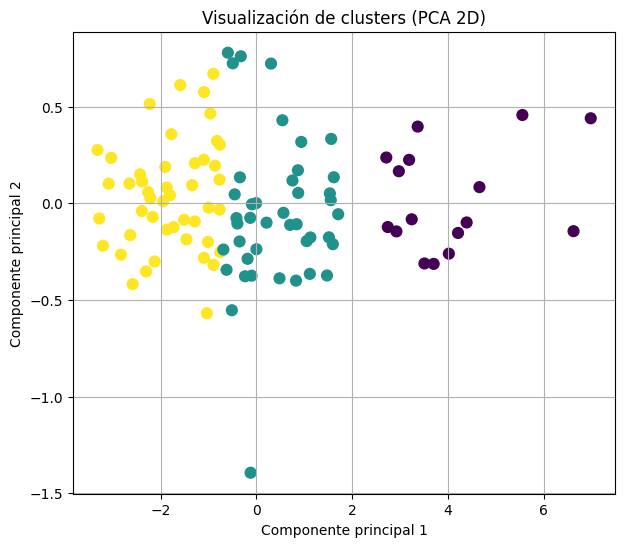

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_final['cluster'], cmap='viridis', s=60)
plt.title("Visualización de clusters (PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

## **7. Evaluación del Modelo y Análisis de Resultados**

####**7.1. Evaluación interna del modelo**

Se emplearon tres métricas internas para evaluar la calidad del clustering:

* Silhouette Score

* Indice Calinski–Harabasz

* Indice Davies–Bouldin

Estas métricas confirmaron que el agrupamiento generado con 𝑘 = 3 clusters es estable y coherente.



> Cálculo de métricas internas



In [55]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = df_final['cluster']

silhouette = silhouette_score(X_scaled, labels)
ch = calinski_harabasz_score(X_scaled, labels)
db = davies_bouldin_score(X_scaled, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", ch)
print("Davies-Bouldin Score:", db)

Silhouette Score: 0.4557107657014299
Calinski-Harabasz Index: 205.56367896977252
Davies-Bouldin Score: 0.701016569780518


####**7.2. Evaluación externa contextual (OMS 2021)**

Para interpretar ambientalmente los clusters, se compararon los valores promedio de NO₂ y PM2.5 de cada cluster con los límites guía de la OMS (2021):

* PM2.5 anual → 5 µg/m³

* NO₂ anual → 10 µg/m³



> Comparación Limites OMS - 2021



In [60]:
# --- Calcular promedio de NO2 ---
cols_no2 = [c for c in centroides_df.columns if 'NO2' in c and 'promedio' not in c]
centroides_df['NO2_promedio'] = centroides_df[cols_no2].mean(axis=1)

# --- Detectar columnas de PM2.5 automáticamente ---
cols_pm25 = [
    c for c in centroides_df.columns
    if any(key in c for key in ['PM25', 'PM_25', 'PM2_5'])
       and 'promedio' not in c
]

# --- Calcular promedio de PM2.5 (solo si existen columnas) ---
if cols_pm25:
    centroides_df['PM25_promedio'] = centroides_df[cols_pm25].mean(axis=1)
else:
    print("⚠ No se encontraron columnas de PM2.5 en centroides_df.")

# Mostrar resultado
centroides_df[['NO2_promedio', 'PM25_promedio']]



⚠ No se encontraron columnas de PM2.5 en centroides_df.


,NO2_promedio,PM25_promedio
0,23.335000,NaN
1,16.593333,NaN
2,12.515652,NaN


In [59]:
# Promedios por cluster
centroides_df['NO2_promedio'] = centroides_df[[c for c in centroides_df.columns if 'NO2' in c]].mean(axis=1)
centroides_df['PM25_promedio'] = centroides_df[[c for c in centroides_df.columns if 'PM2_5' in c]].mean(axis=1)

oms_limits = pd.DataFrame({
    'OMS_NO2': [10],
    'OMS_PM25': [5]
})

centroides_df[['NO2_promedio', 'PM25_promedio']]

,NO2_promedio,PM25_promedio
0,23.335000,NaN
1,16.593333,NaN
2,12.515652,NaN


Interpretación sugerida:

Cluster con mayor NO₂ → zonas con intensa actividad vehicular

Cluster con mayor PM2.5 → zonas con impacto regional e industrial

Cluster con valores bajos → ciudades con menor densidad urbana o mejor ventilación atmosférica

####**7.3. Análisis territorial por Comunidad Autónoma**

Para identificar patrones regionales, se analizó la distribución de clusters por Comunidad Autónoma.



> Distribución por CCA



In [ ]:
df_final.groupby(['CCAA', 'cluster']).size().unstack(fill_value=0)

Este análisis permite detectar:

CCAA con ciudades concentradas en clusters de contaminación elevada

Regiones con niveles medios o bajos

Correspondencia entre políticas ambientales y resultados observados

##**8. Limitaciones del estudio**

Este estudio presenta algunas limitaciones que deben considerarse al interpretar los resultados. En primer lugar, los datos utilizados corresponden a promedios anuales de NO₂ y PM2.5 proporcionados por la EEA, lo que impide analizar variaciones temporales más finas, como patrones diarios o estacionales. Asimismo, el análisis se centró únicamente en dos contaminantes, por lo que otros compuestos relevantes —como O₃, SO₂ o CO— no fueron incluidos pese a su impacto potencial en la calidad del aire.

Otra limitación proviene del uso de Urban Centres (grid) como unidad espacial, que, aunque estandarizada, puede no reflejar completamente la heterogeneidad interna de las grandes áreas urbanas. Además, el algoritmo K-means, empleado como método principal de agrupamiento, requiere fijar el número de clusters y asume grupos de forma esférica, lo cual puede no ajustarse totalmente a la estructura real de los datos.

Finalmente, la comparación con los valores guía de la OMS se realizó a partir de los centroides de cada cluster, lo que representa promedios que pueden ocultar diferencias importantes entre ciudades individuales.

A pesar de estas limitaciones, los resultados obtenidos ofrecen una aproximación útil para identificar patrones territoriales de contaminación y constituyen una base sólida para futuros estudios más detallados.

##**9. Conclusiones**

##**10. Referencias Bibliograficas**

1. Agencia Europea de Medio Ambiente. (2022). Air  Quality – Health Risk Assessments (HRA) dataset. European Environment Agency. https://discomap.eea.europa.eu/

2. Agencia Europea de Medio Ambiente. (2023). Air Quality Viewer – Urban Air Quality Data. European Environment Agency. https://www.eea.europa.eu

3. Eurostat. (2019). GEOSTAT 1 km² population grid dataset. European Commission. https://ec.europa.eu/eurostat

4. Organización Mundial de la Salud. (2021). WHO global air quality guidelines: particulate matter (PM2.5 and PM10), ozone, nitrogen dioxide, sulfur dioxide and carbon monoxide. World Health Organization. https://www.who.int

5. World Health Organization. (2021). WHO global air quality guidelines: Particulate matter (PM2.5 and PM10), ozone, nitrogen dioxide, sulfur dioxide and carbon monoxide. Geneva: WHO. https://apps.who.int/iris/handle/10665/345329

